*<center>Exercise 1</center>*
Task A:
Write down a formula that allows to numerically solve the integrals:

$$\int_{-\infty}^{\infty}e^{-x^2}x^2dx$$

$$\int_{-\infty}^{\infty}e^{-x^2}cos^2(x)dx$$

**Solution:**
https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature
https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.polynomial.hermite.hermgauss.html
https://stackoverflow.com/questions/33118677/numerical-integration-for-gaussian-function-indefinite-integral





$I = 2(\int_{0}^{1}\exp{-(\frac{1}{t})^{2}}\frac{1}{t^{2}}dt + \int_{0}^{1}\exp{(-x^{2})}x^{2}dx)$

$I = 2(\int_{0}^{1}\exp{(-x^{2})}\cos(x)dx + \int_{0}^{1}\exp{(-1/t^{2})}\cos(\frac{1}{t})\frac{1}{t^{2}}dt)$



*Task B:
Draw 100 samples from a uniform distribution (interval [0, 1]) using any of popular libraries
or built in functions of matlab or python. Do the same for the normal distribution
(σ = 1; µ = 0).*

**Solution:**
We choose at first to use the most simple case, the constant uniform distribution with a p.d.f. as $$p(x)=\frac{1}{b-a}$$


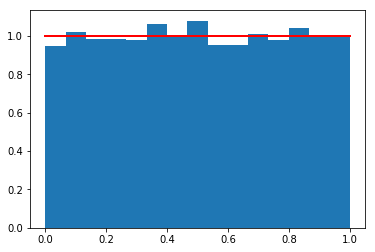

In [2]:
import numpy as np
s = np.random.uniform(0,1,10000)

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

#reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html


Now we do it for the normal distribution but with 100000 samples (instead of 100) to get a very fit histogram.

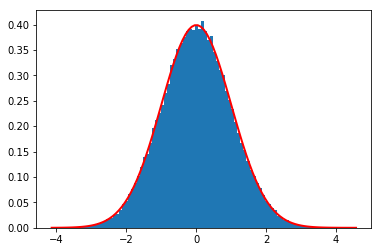

In [3]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html

Task C:
Numerically solve the integrals of Task A using samples drawn from a suitable distribution.
Both integrals have an analytic solution (see e.g. Bronstein). How close do you get?



In [4]:
import numpy as np

N = 1000000

first = lambda x: x**2* np.exp(-x**2);

second = lambda x: np.exp(-1./(x**2)) * (1./(x**4));

third = lambda x: np.cos(x)* np.exp(-x**2)

fourth = lambda x: np.exp(-1/(x**2))* (1/(x**2))*np.cos(1/x) #This function was typed wrong, compared to the equation in task A

samples_x=np.random.rand(1,N)



samples_x=np.sort(samples_x)

samples_t=np.random.rand(1,N)

samples_t=np.sort(samples_t)

x = np.zeros(N)
t = np.zeros(N)



for i in range(1,N):
    x[i-1]=samples_x[0][i]-samples_x[0][i-1]


for i in range(1,N):
    t[i-1]=samples_t[0][i]-samples_t[0][i-1]


fx=first(samples_x)
ft=second(samples_t)

integral_1=2*(np.dot(fx,x)+np.dot(ft,t))
print(f'The numerical integral of the first equation in Task A is {sum(integral_1)} and the analytical integral is 0.88623.')

fx_1=third(samples_x)

ft_1=fourth(samples_t)

integral_2=2*(np.dot(fx_1,x)+np.dot(ft_1,t))


print(f'The numerical integral of the first equation in Task A is {sum(integral_2)} and the analytical integral is 1.3804.')




The numerical integral of the first equation in Task A is 0.8862232856495387 and the analytical integral is 0.88623.
The numerical integral of the first equation in Task A is 1.3803879190603703 and the analytical integral is 1.3804.


Task D:
Could you infer the analytical solution of the first integral using the formulas of Task C?
If yes, how?

If we integrate this integrals by parts, we will end up with a non elementary integral which is $\int_{0}^{1}e^{-x^2}dx$. In order to solve this, we could use a Taylor Series but this will never end up with the exact solution since they are a finite number of approximations.

*<center>Exercise 2</center>*

Task A: 
Calculate the expectation value of the variance, which is defined by:

$$<(x-<x>)^2>$$

**Solution:**

We expand the square inside to get this very well meet result. We also use the linearity property of the expectation value and that $<x<x>>=<x>^2$ which is easy to see.

\begin{align}
<(x-<x>)^2>\\=<(x^2+<x>^2-2x<x>)> \\=<x^2>+<x>^2-2<x<x>>\\=<x^2>+<x>^2-2<x>^2\\=<x^2>-<x>^2
\end{align}

Task B: Show that the formation of the expectation value is a linear operation on the function $v(x)$.

**Solution:**
There is no secret on this result since the linearity of integration, which in our case by definition of expectation value is an improper integral. $p(x)$ is our p.d.f.

$$<\alpha·v(x)>=\int_{-\infty}^{\infty}\alpha v(x)p(x)dx=\alpha ·\int_{-\infty}^{\infty} v(x)p(x)dx=\alpha·<v(x)>$$



*<center>Exercise 3</center>*

Task A:
Show that $p(x|(\mu_1,\mu_2,\sigma_1^2,\sigma_2^2))$ is a probability density function.

**Solution:**

Since $N(x;\mu_1,\sigma)$ is pdf, $p(x|(\mu_1,\mu_2,\sigma_1^2,\sigma_2^2))$ should be also.

Let's verify that $p(x|(\mu_1,\mu_2,\sigma_1^2,\sigma_2^2))\geq 0 \quad	\forall x$ and that $\int_{-\infty}^{\infty}p(x|(\mu_1,\mu_2,\sigma_1^2,\sigma_2^2))=1$. 

*first condition*

Because every normal function is formed by an exponential function and this function it's always 0 or positive, so you end up with the sum of two positive numbers which should be always positive.

*second condition*

Since we already know that the expected value of a gaussian integral is the mean of that distribution, we will get that 

Task B:
Why is it dificult to find a maximum likelihood solution for $p(x|(μ_1 , μ_2 , σ_1^2 , σ_2^2 ))$ ?
(Just answer the question and motivate the answer, do not try to find a solution.)

Because we need to adjust 4 random variables at the same time, both expected values and standard deviations. 




